In [17]:
import qiskit 
from qiskit import IBMQ
from qiskit.quantum_info import Statevector, DensityMatrix

import numpy as np

In [45]:
from qiskit import Aer

In [42]:
IBMQ.get_provider(group="open")

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
provider = IBMQ.load_account()
backends = list(provider.backends())

/var/folders/wv/cwvgxcp14lxcs5jn0r6p87sr0000gn/T/ipykernel_38957/4023785056.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  provider = IBMQ.load_account()
/var/folders/wv/cwvgxcp14lxcs5jn0r6p87sr0000gn/T/ipykernel_38957/4023785056.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


In [3]:
backends

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [1]:
main_register_n = 3
anscilla_register_n = 0
classic_register_n = 3
qr_main = QuantumRegister(main_register_n, name="main")
qr_anscilla = QuantumRegister(anscilla_register_n, name= "anscilla")
cr  = ClassicalRegister(classic_register_n, name="classic")

NameError: name 'QuantumRegister' is not defined

In [31]:
qc = QuantumCircuit(qr_main, qr_anscilla, cr, name ="circuit")

In [32]:
qc.h(0)
qc.cnot(0, 1)
qc.cnot(0, 2)

In [33]:
qc.draw()

┌───┐          
   main_0: ┤ H ├──■────■──
           └───┘┌─┴─┐  │  
   main_1: ─────┤ X ├──┼──
                └───┘┌─┴─┐
   main_2: ──────────┤ X ├
                     └───┘
classic: 3/═══════════════

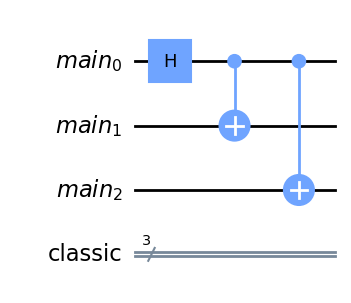

In [34]:
qc.draw("mpl")

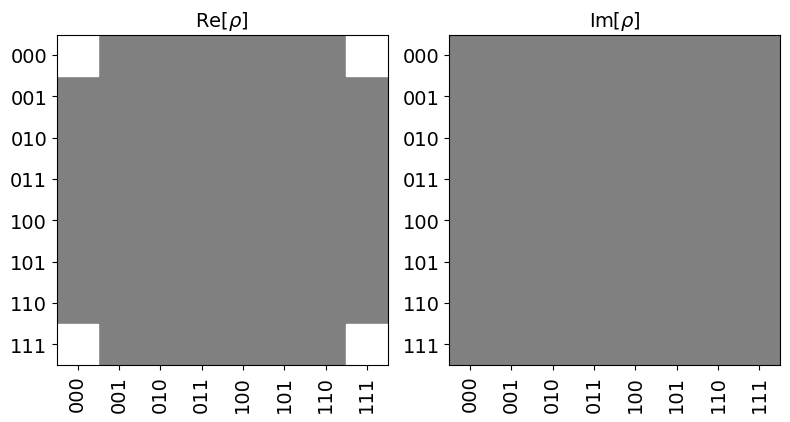

In [35]:
Statevector(qc).draw(output="hinton")

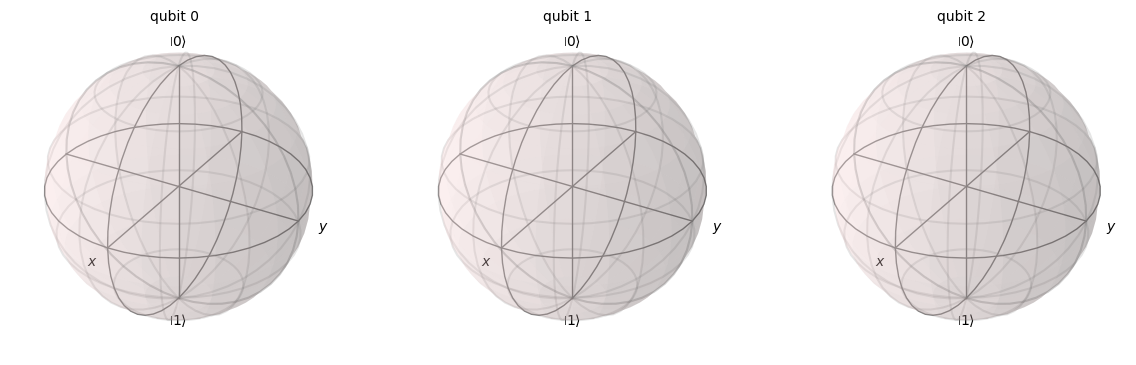

In [36]:
Statevector(qc).draw(output="bloch")

In [37]:
dm = DensityMatrix(qc)

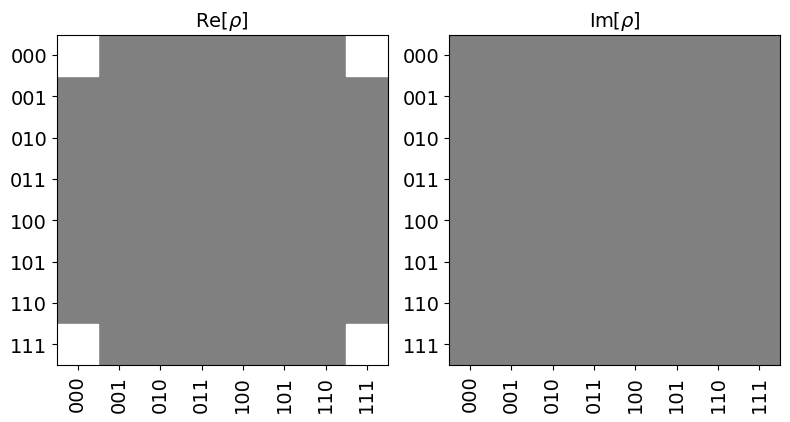

In [38]:
dm.draw(output="hinton")

In [39]:
qc.draw()

┌───┐          
   main_0: ┤ H ├──■────■──
           └───┘┌─┴─┐  │  
   main_1: ─────┤ X ├──┼──
                └───┘┌─┴─┐
   main_2: ──────────┤ X ├
                     └───┘
classic: 3/═══════════════

In [40]:
qc.measure([0, 1, 2], [0, 1, 2])

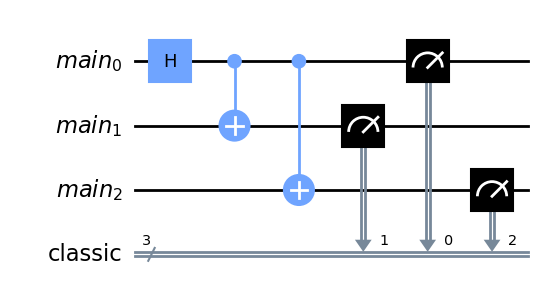

In [47]:
qc.draw("mpl")

## U gates in qiskit

$$U_3 = U(\theta, \phi, \lambda)$$

$$| \psi \rangle = \alpha |0 \rangle + \beta | 1 \rangle$$

$$\hat{n} = (\sin(\theta) \cos(\phi), \sin(\theta) \sin(\phi), \cos(\theta))$$

$$\hat{n} \vec{\sigma} |  \psi_+ \rangle = | \psi_+ \rangle$$

$$\hat{n} \vec{\sigma} |  \psi_- \rangle = - | \psi_- \rangle$$

$$| \psi_+ \rangle = \cos(\frac{\theta}{2}) |0\rangle + e^{i\phi} \sin(\frac{\theta}{2}) |1 \rangle$$
$$| \psi_- \rangle = -\sin(\frac{\theta}{2}) |0\rangle + e^{i\phi} \cos(\frac{\theta}{2}) |1 \rangle$$

See Eq 10.27 and 10.28 of the Introduction to Quantum Mechanics written by Griffith, 2nd.

$$\begin{pmatrix}\cos(\frac{\theta}{2}) \\ e^{i\phi} \sin(\frac{\theta}{2})\end{pmatrix} = 
\begin{pmatrix}
\cos(\frac{\theta}{2}) & - e^{i \lambda} \sin(\frac{\theta}{2}) \\ 
e^{i\phi} \sin(\frac{\theta}{2}) & e^{i (\phi+\lambda) \cos(\frac{\theta}{2})}
\end{pmatrix} \cdot 
\begin{pmatrix} 1 \\ 0\end{pmatrix}$$

$$U_2 = U_3(\frac{\pi}{2}, \phi, \lambda)$$
$$U_1 = U_3(0, 0, \lambda)$$

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.tools.visualization import plot_histogram
from qiskit import Aer, execute
backend = Aer.get_backend('qasm_simulator')

In [12]:
main_register_n = 2
anscilla_register_n = 0
classic_register_n = 2
qr_main = QuantumRegister(main_register_n, name="main")
qr_anscilla = QuantumRegister(anscilla_register_n, name= "anscilla")
cr  = ClassicalRegister(classic_register_n, name="classic")

In [26]:
qc = QuantumCircuit(qr_main, qr_anscilla, cr)

In [27]:
qc.h(0)
qc.cx(0, 1)
qc.measure(0,0)
qc.measure(1,1)

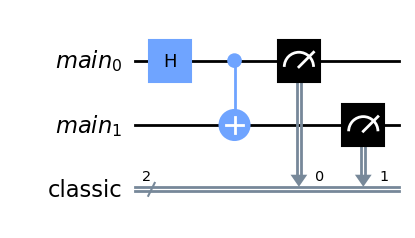

In [28]:
qc.draw("mpl")

In [35]:
job = execute(qc, backend=backend, shots= 1000)
result = job.result()

In [36]:
result.data()

{'counts': {'0x3': 515, '0x0': 485}}

In [37]:
result.get_counts(qc)

{'11': 515, '00': 485}

In [19]:
plot_histogram(result.get_counts(qc))

QiskitError: 'No counts for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1597bed10>"'

In [20]:
from qiskit.quantum_info import Statevector, DensityMatrix


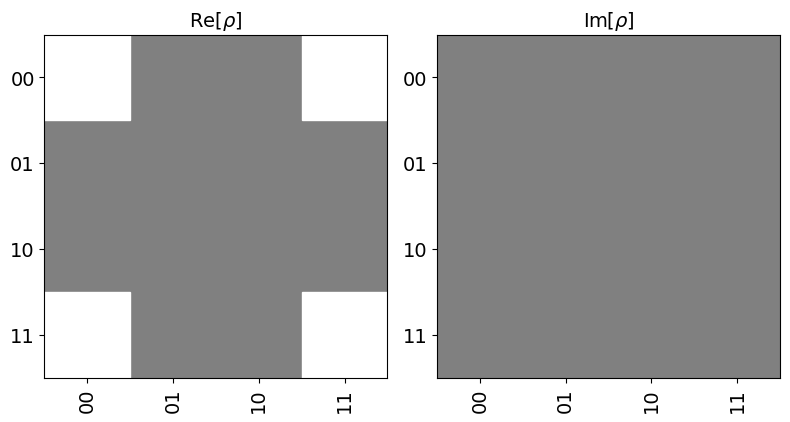

In [23]:
st = Statevector(qc)
)

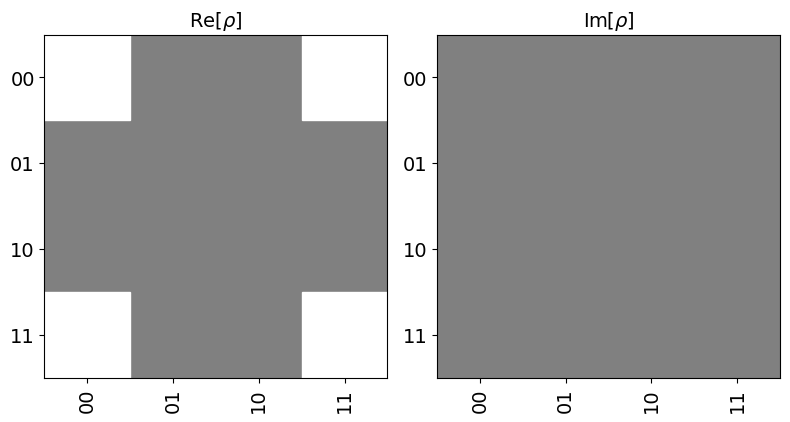

In [24]:
st.draw("hinton")

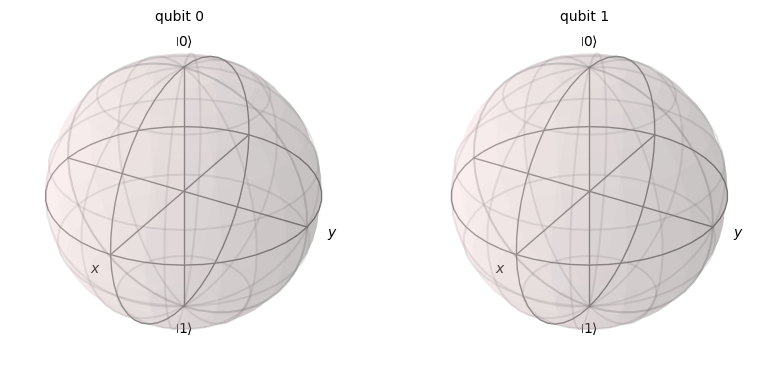

In [25]:
st.draw("bloch")

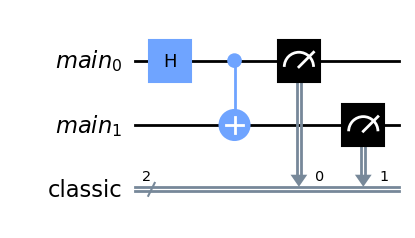

In [55]:
qc.draw("mpl")